# Exploring Weather Trends - Project Instructions

## Summary


Udacity Task :
**************

In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

Udacity Sugesstion :
********************

Open up the CSV in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R

I used Python, though it was not yet covered in the class, but tried to explore with my immature internet search and refered the great book "Python for Data Ananlysis - Wes McKinney"

Shall refactor the code here once I learn more about Pandas more comprehensively in the upcoming classes

### Extract the data from the database

### Importing all the necessary modules  to CSV

In [73]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  

### Loading the data from CSV to Pandas DataFrame

In [74]:
df_city_data = pd.read_csv('city_data.csv')
df_global_data = pd.read_csv('global_data.csv')
df_city_list = pd.read_csv('city_list.csv')

### Funtion to return a DF with city data and global data

In [75]:
def mycity_to_global(city_df, global_df, city='Pune'):
    '''
    This function takes the following:
    city_df -> [DataFrame] All city temperature, 
    global_df -> [DataFrame] The global temperature and 
    city -> [String] one city name(mycity) and 
    
    Returns a tuple of :
    1. DataFram which contains which contains both the global temperature and the city temperature
    2. DataFram with the coff. of correlation between the global temperature and city temperature 
    
    '''
    df_my_city_data = city_df[city_df.city == city] 
    list_my_city_year = list(df_my_city_data['year'])
    
    df_my_global_data = global_df.loc[global_df['year'].isin(list_my_city_year)]
    df_my_global_data.index = range(len(df_my_global_data))
    df_my_global_data.rename(columns={'avg_temp':'global_avg_temp'}, inplace=True)
    
    df = pd.merge(df_my_city_data, df_my_global_data, on='year')
    df.rename(columns={'avg_temp': "{}_avg_temp".format(city.lower())}, inplace=True)
    
    city_col = 'moving_avg_{}'.format(city.lower())

    df['moving_avg_global'] = df['global_avg_temp'].rolling(window=2).mean()
    df[city_col] = df['{}_avg_temp'.format(city.lower())].rolling(window=2).mean()
    
    df.dropna(axis=0, inplace=True)
    
    # Calculating the Coff. of Correlation
    coff = df[[city_col, 'moving_avg_global']].corr()
    
    return df, coff

### Lets try to extract my city temperature(Pune, India)

In [76]:
df, c_pune = mycity_to_global(df_city_data, df_global_data, city='Pune')

In [77]:
len(df)

208

In [78]:
df.head()

,year,city,country,pune_avg_temp,global_avg_temp,moving_avg_global,moving_avg_pune
1,1797,Pune,India,25.17,8.51,8.390,24.780
2,1798,Pune,India,24.05,8.67,8.590,24.610
3,1799,Pune,India,24.68,8.51,8.590,24.365
4,1800,Pune,India,24.67,8.48,8.495,24.675
5,1801,Pune,India,23.94,8.59,8.535,24.305


### Lets check the cofficient of correletation 

In [80]:
c_pune.head()

,moving_avg_pune,moving_avg_global
moving_avg_pune,1.000000,0.870916
moving_avg_global,0.870916,1.000000


### Lets try to generate the line chart my city temperature(Pune, India) w.r.t. global temperature

In [81]:
def gen_charts(df, cities, saveas):
    '''
    This function takes "df", "cities", "saveas", where:
    
    df -> [DataFrame] The DataFrame which contains all the temperature data (for all the cities including global temperature)
    cities -> [List] A list of all the cities
    saveas -> [String] Some name of the image file, which this function will generate and save
    
    '''
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

    plt.rc('font', size=12)         
    plt.rc('axes', titlesize=12)     
    plt.rc('axes', labelsize=12)    
    plt.rc('xtick', labelsize=12)   
    plt.rc('ytick', labelsize=12)    
    plt.rc('legend', fontsize=12)    
    plt.rc('figure', titlesize=12)  

    plt.plot(df.year, df.moving_avg_global)
    for c in cities:
        plt.plot(df.year, df['moving_avg_{}'.format(c.lower())])

    cities.insert(0, 'Global')
    plt.legend(cities, bbox_to_anchor=(.85,0.5), fontsize='large')

        
    plt.xlabel("Year")
    plt.ylabel("Moving Avg. Temperature (in Celsius)")
    title = " vs ".join(cities)
    plt.title("Weather Trend Analysis - " + title)
    #plt.legend(["Global", "India(Pune)"], bbox_to_anchor=(.85,0.5), fontsize='large')
    plt.rcParams["figure.figsize"] = [20,10]
    
    plt.savefig(saveas)
    

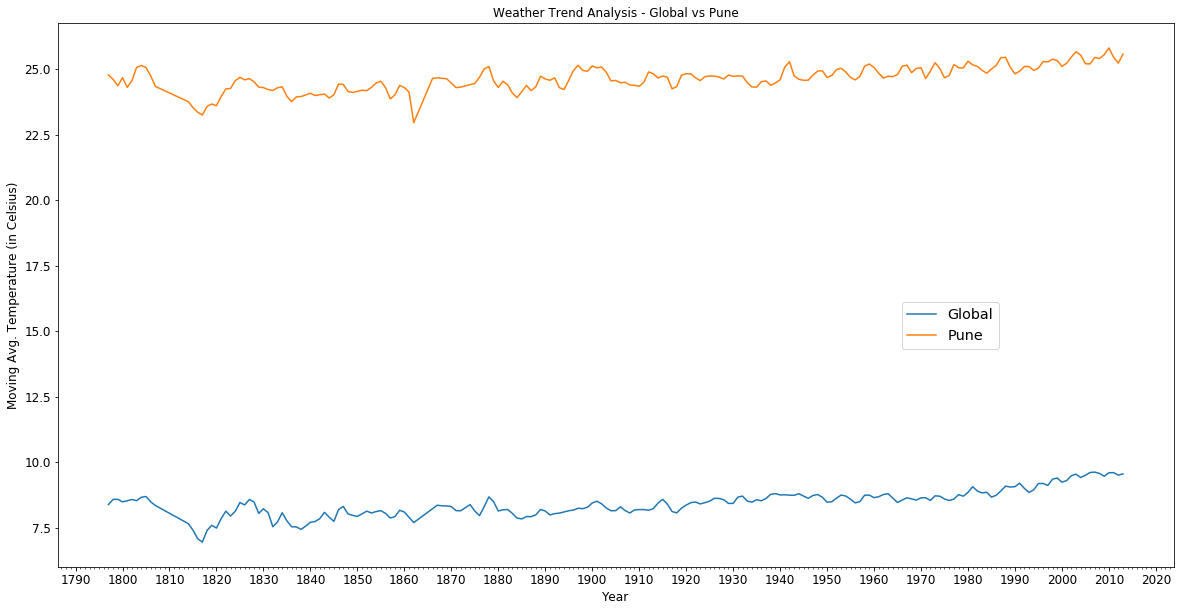

In [83]:
df, c_pune = mycity_to_global(df_city_data, df_global_data, city='Pune')
p = gen_charts(df, cities=['Pune'], saveas="Trend_Analysys_Pune.png")

In [72]:
c_pune

,moving_avg_pune,moving_avg_global
moving_avg_pune,1.000000,0.870916
moving_avg_global,0.870916,1.000000


### Global Temperature Analysis with Multiple Cities

In [84]:
def manycity_to_globle(city_df, global_df, cities=['Pune']):
    '''
    This function takes the following:
    city_df -> [DataFrame] All city temperature, 
    global_df -> [DataFrame] The global temperature and 
    city -> [List] one or more city 
    
    Returns:
    DataFram which contains which contains all the city temperature and the global temperature
    
    '''
    city_dfs = []
    city_crr = []
    for city in cities:
        _df, _crr = mycity_to_global(city_df, global_df, city=city)
        city_dfs.append(_df)
        city_crr.append(_crr)
    
    for d in city_dfs:
        global_df = global_df.merge(d, on='year')
    
    dup_column = [i for i in global_df.columns if i.startswith('moving_avg_global_') or i.startswith('global_avg_temp_')]
    global_df.drop(dup_column, axis=1, inplace=True)
    
    return global_df

### Lets try to generate the line chart for multiple cities w.r.t. global temperature


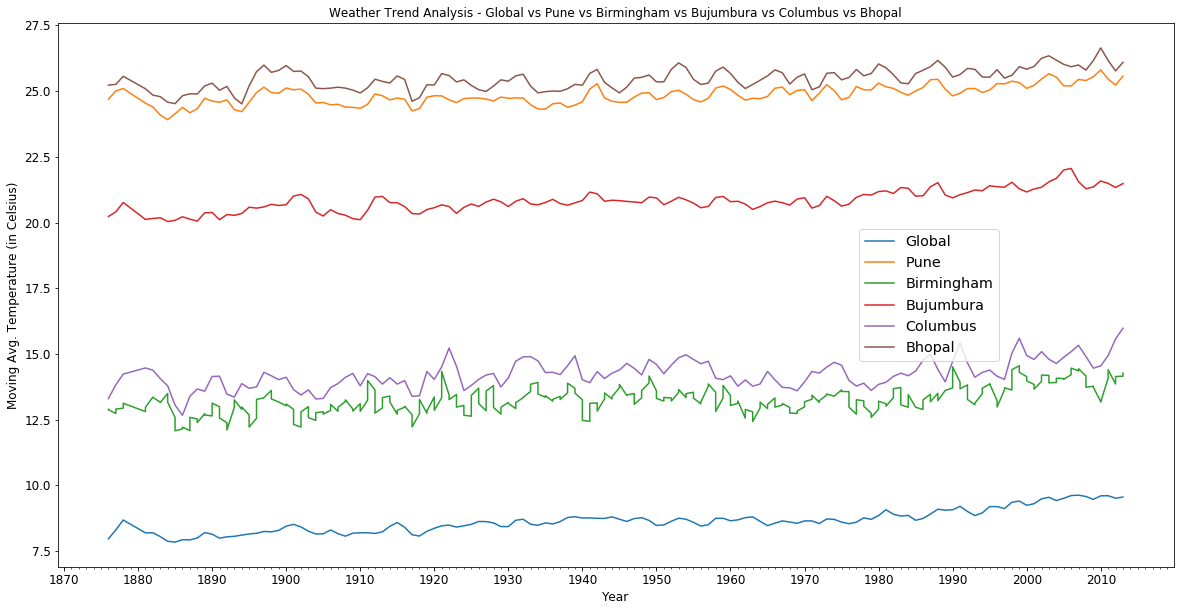

In [87]:
cities = ['Pune', 'Birmingham', 'Bujumbura', 'Columbus', 'Bhopal']
df = manycity_to_globle(df_city_data, df_global_data, cities=cities)
gen_charts(df, cities=cities, saveas="Trend_Analysys_Multiple_City.png")